In [ ]:
#Mount your google drive: require authorization
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
#Launch some linux commands by adding "!" before a command
!pwd
!ls
!ls drive/My\ Drive

/content
drive  sample_data
'Colab Notebooks'		        Model
 Documents_Saad			       'Paris test'
'Documents stagiaire'		       'rapport lailouette'
'Documents Visa 2021 2022'	       'Rapport LVMT'
 Donda				        Recovery
 ECM				        ressourcessss
 gifs				       'RIB SAAD TAZROUTE.pdf'
 Imagetest			        SmallDrone
 Inside-Two-i-S02E15-Anomalies-V2.mp4  'Visa Saad.rar'
 main_CV2_21.gdoc		        Work


In [ ]:
#Change your location in the arborescence
import os
#################################################CHANGE TO YOUR PATH
os.chdir('/content/drive/MyDrive/ECM/ComputerVision/')#########################


In [ ]:
!pwd
!ls

/content/drive/My Drive/ECM/ComputerVision
 CV_TP1_21_students.ipynb   img2.ppm   img5.ppm       main_CV1_21.pdf
 CV_TP2_21_students.ipynb   img3.ppm  'Large scale'   main_CV2_21.pdf
 img1.ppm		    img4.ppm   lena.jpeg


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#Load MNIST Dataset
from sklearn.datasets import fetch_openml
#from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', cache=False)

print(mnist.data.shape)
print(mnist.target.shape)
print(np.unique(mnist.target))



(70000, 784)
(70000,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:

X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
print(type(mnist))


<class 'sklearn.utils.Bunch'>


##Build your dataset

Take the first 300 digits as your dataset.

Reshape the image data into 28*28 images and display one of them using cv2_imshow

In [ ]:
X = mnist.data[:300]
y = mnist.target[:300]
print(X.shape)
X = np.reshape(X, (300,28, 28))
print(X.shape)
#displayed the second image of the X set
cv2_imshow(X[2])


(300, 784)
(300, 28, 28)


## Extract dense features

For each image extract dense daisy features using the following code.

More information on daisy can be found here: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_daisy.html

Make sure you reshape the output to obtain a 2d array per image (nb features * feature dimension)



In [ ]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt

full_descs = []

for t in range(len(X)):
  img  = X[t]
  descs, descs_img = daisy(img, step=2, radius=8, rings=2, histograms=6, orientations=8, visualize=True)  #sortie (6x6x104) ====} (36,104) pour chaque feature 
  descs = np.reshape(descs,(36,104))

  full_descs.append(descs)
full_descs = np.array(full_descs)
print(full_descs.shape)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Normalization

Perform l2 normalization on each feature descriptor.

In [ ]:
import sklearn
full_desc = []
for feature in full_descs :
  feature = sklearn.preprocessing.normalize(feature, norm="l2")
  full_desc.append(feature)
full_desc = np.array(full_desc)

In [ ]:
#You can check that the normalization is properly done.
print(np.sum(np.power(full_desc[0,0,:],2.0)))

1.0


##Clustering and embeddings

Look and try to understand the following codes.
These aggregators include the clustering.

After dividing your data into train and test set, perform the clustering with k=100 clusters on all the features of the train set.

Then, compute the bow and vlad descriptors for each image of the train and test sets.

Pay attention to the normalization apllied on the computed embeddings.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_desc, y, test_size=0.33, random_state=42, shuffle = True)
print(X_train.shape)
print(y_train.shape)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
print(X_test.shape)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0).fit(X_train)



(201, 36, 104)
(201,)
(99, 36, 104)


In [ ]:
!pip install feature-aggregation

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator


class BaseAggregator(BaseEstimator):
    """Implement any functions that can be shared among all feature
    aggregation methods."""

    def __init__(self, dimension_ordering="tf"):
        self.dimension_ordering = dimension_ordering

    def _reshape_local_features(self, X):
        """Reshape a n-dimensional array into a 2d array of local features.
        Account for the case that X is a list because not all samples have
        the same number of local features.
        """
        if len(X) == 0:
            raise ValueError("X cannot be empty")

        dims = len(X[0]) if self.dimension_ordering == "th" else X[0].shape[-1]
        if isinstance(X, list):
            arrays = [
                x.T.reshape(-1, dims)
                if self.dimension_ordering == "th"
                else x.reshape(-1, dims)
                for x in X
            ]
            lengths = [len(x) for x in arrays]
            X = np.vstack(arrays)
        else:
            if self.dimension_ordering == "th":
                X = X.transpose(*([0] + range(2, len(X.shape)) + [1]))
            lengths = [int(np.prod(X.shape[1:-1]))]*X.shape[0]
            X = X.reshape(-1, dims)

        return X, lengths

In [ ]:
"""Quantize local features and aggregate them in a Bag Of Words manner"""

import numpy as np
from sklearn import cluster

#from .base import BaseAggregator


class BagOfWords(BaseAggregator):
    """Compute a Bag of Words model and aggregate local features with it.
    
    Train a MiniBatchKMeans on the data and then use the centroids as a
    codebook to encode any set of local features.
    Parameters
    ----------
    n_codewords : int
                  The codebook size aka the number of clusters
    l1_norm : boolean
              Whether to normalize the transformed data or not
    dimension_ordering : {'th', 'tf'}
                         Changes how n-dimensional arrays are reshaped to form
                         simple local feature matrices. 'th' ordering means the
                         local feature dimension is the second dimension and
                         'tf' means it is the last dimension.
    """
    def __init__(self, n_codewords, l1_norm=True, dimension_ordering="tf"):
        self.n_codewords = n_codewords
        self.l1_norm = l1_norm
        self._clusterer = cluster.MiniBatchKMeans(
            n_clusters=self.n_codewords,
            n_init=1,
            compute_labels=False
        )

        super(self.__class__, self).__init__(dimension_ordering)

    @property
    def centroids(self):
        """The centroids of the encoding"""
        return self._clusterer.cluster_centers_.copy()

    @centroids.setter
    def centroids(self, _centroids):
        self._clusterer.cluster_centers_ = _centroids.copy()

    def fit(self, X, y=None):
        """Build the codebook for the Bag of Words model.
        Apply the clustering algorithm to the data and use the cluster centers
        as codewords for the codebook.
        Parameters:
        -----------
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)

        self._clusterer.fit(X)

        return self

    def partial_fit(self, X, y=None):
        """Partially learn the codebook from the provided data.
        Run a single iteration of the minibatch KMeans on the provided data.
        Parameters:
        -----------
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)
        self._clusterer.partial_fit(X)

        return self

    def transform(self, X):
        """Compute the Bag of Words representation of the provided data.
        
        Parameters
        ----------
        X : array_like or list
            The local features to aggregate. They must be either nd arrays or
            a list of nd arrays. In case of a list each item is aggregated
            separately.
        """
        # Get the local features and the number of local features per document
        X, lengths = self._reshape_local_features(X)

        # Preprocess the lengths list into indexes in the local feature array
        starts = np.cumsum([0] + lengths).astype(int)
        ends = np.cumsum(lengths).astype(int)

        # Transform and aggregate the local features
        words = self._clusterer.predict(X)
        bow = np.vstack([
            np.histogram(
                words[s:e],
                bins=np.arange(self.n_codewords + 1) - 0.5,
                density=False
            )[0]
            for s, e in zip(starts, ends)
        ])

        if self.l1_norm:
            bow = bow.astype(float) / bow.sum(axis=1).reshape(-1, 1)

        return bow

    def inertia(self, X):
        """Return the value of the KMeans objective function on the provided
        data.
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)

        return -self._clusterer.score(X)

    def score(self, X, y=None):
        """Return the negative inertia so that the best score is the max
        score.
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        return -self.inertia(X)

In [ ]:
"""Quantize local features and aggregate them using the Vector of Locally
Aggregated Descriptors (VLAD) encoding"""

import numpy as np
from sklearn import cluster
from sklearn.metrics import pairwise_distances



class Vlad(BaseAggregator):
    """Compute a VLAD model and aggregate local features with it.
    Parameters
    ----------
    n_codewords: int
                 The codebook size aka the number of clusters.
    inner_batch: int
                 The batch size used to compute the differences between
                 the feature descriptors and the centroids.
    normalization: int
                   A bitmask of possible normalizations
    dimension_ordering : {'th', 'tf'}
                         Changes how n-dimensional arrays are reshaped to form
                         simple local feature matrices. 'th' ordering means the
                         local feature dimension is the second dimension and
                         'tf' means it is the last dimension.
    """


    POWER_NORMALIZATION = 1
    L2_NORMALIZATION = 2

    def __init__(self, n_codewords, normalization=3, inner_batch=128,
                 dimension_ordering="tf"):
        self.n_codewords = n_codewords
        self.inner_batch = inner_batch
        self.normalization = normalization

        self._clusterer = cluster.MiniBatchKMeans(
            n_clusters=self.n_codewords,
            n_init=1,
            compute_labels=False
        )

        super(self.__class__, self).__init__(dimension_ordering)

    def fit(self, X, y=None):
        """Build the codebook for the VLAD model using KMeans.
        Apply the clustering algorithm to the data and use the cluster centers
        as codewords for the codebook.
        Parameters:
        -----------
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)

        self._clusterer.fit(X)

        return self

    def partial_fit(self, X, y=None):
        """Partially learn the codebook from the provided data.
        Run a single iteration of the minibatch KMeans on the provided data.
        Parameters:
        -----------
        X : array_like or list
            The local features to train on. They must be either nd arrays or
            a list of nd arrays.
        """
        X, _ = self._reshape_local_features(X)
        self._clusterer.partial_fit(X)

        return self

    def transform(self, X):
        """Compute the Bag of Words representation of the provided data.
        Parameters
        ----------
        X : array_like or list
            The local features to aggregate. They must be either nd arrays or
            a list of nd arrays. In case of a list each item is aggregated
            separately.
        """
        # Get the local features and the number of local features per document
        X, lengths = self._reshape_local_features(X)

        # Preprocess the lengths list into indexes in the local feature array
        starts = np.cumsum([0] + lengths).astype(int)
        ends = np.cumsum(lengths).astype(int)

        words = self._clusterer.predict(X)
        dims = len(X[0])

        vlad = np.zeros((len(lengths), dims*self.n_codewords))
        v = np.zeros((self.inner_batch, self.n_codewords, dims))
        for i, (s, e) in enumerate(zip(starts, ends)):
            for j in range(s, e, self.inner_batch):
                ee = min(j+self.inner_batch, e)

                v.fill(0)
                v[range(ee-j), words[j:ee]] = \
                    X[j:ee] - self._clusterer.cluster_centers_[words[j:ee]]
                vlad[i] += v[:ee-j].sum(axis=0).ravel()
            vlad[i] /= lengths[i]
        
        # Check if we should be normalizing the power
        if self.normalization & self.POWER_NORMALIZATION:
            vlad = np.sqrt(np.abs(vlad))*np.sign(vlad)

        # Check if we should be performing L2 normalization
        if self.normalization & self.L2_NORMALIZATION:
            vlad /= np.sqrt(np.sum(vlad**2, axis=1)).reshape(-1, 1)

        return vlad

In [ ]:
X?shape

(300, 28, 28)

In [ ]:
vlad  = Vlad(n_codewords=100)
vlad.fit(X_train)

X_preds_vlad = vlad.transform(X_test)
print(X_preds_vlad[0].shape[0])

374400


In [ ]:
bow = BagOfWords(n_codewords=100)
bow.fit(X_train)

X_preds_bow = bow.transform(X_test)

print(X_preds_bow[0].shape)

(100,)


##Some questions: 

- what is the dimension of BOW, VLAD and Fisher vectors ? 
    - **voir code cell ci-dessous**
- what is the power normalization ? 

- what are the parameters of the clustering computed by kmeans ? 
    -  **Nombres de cluster + Terme de régularisation  + Init : qui permet de définir comment o initialise nos centroids + degree : degrès du polynome de kernelisation**

- what are those of the GMM ?
    - **Nombres de mixtures + Type de covariance + seuil de convergence (L'algo de maximisation d'esperance s'arrete lorsqu'il arrive à cet erreur )**


In [ ]:

#Dimension of VLAD  vectors
print("dimension du vecteur de features VALD",X_preds_vlad[0].shape)    # k = 2925
X_preds_bow = bow.transform(X_test)

#Dimension of bow  vectors
print("dimension du vecteur de features BOW",X_preds_bow[0].shape)

dimension du vecteur de features VALD (374400,)
dimension du vecteur de features BOW (100,)


## Classification with SVM

For BOW and VLAD perform classification of the small MNIST dataset with linear SVMs.

Make sure your descriptors are L2-normalized and use sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- give results for all encoding and various C values.
- compare BOW and VLAD to using the full image (flatten) as input.
- compute the kernels on train and test sets and compute the SVM again



In [ ]:

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import norma


# pipeline comme décrite dans le cours + variation du param C sur [0,0.1,0.2, ... , 1]
# storing results Ypred et scores sur 
param = np.linspace(0, 1, 11)
YPRED = []
SCORES = []
for c in param : 
  clf = make_pipeline(Vlad(n_codewords=100),StandardScaler(), sklearn.svm.SVC(C=c))
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  YPRED.append(y_pred)
  scores = sklearn.metrics.accuracy_score(y_test, y_pred)
  SCORES.append(scores)




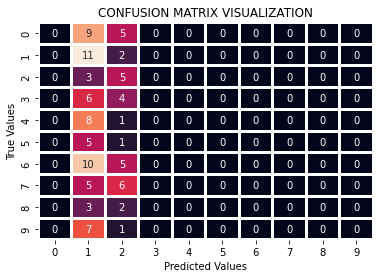

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# plot matrce de confusion
sns.heatmap(confusion_matrix(y_test, YPRED[0]),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()